In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [19]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    n = len(t) #t is array of size n, need to loop through n times when do Euler's method
    h = t[1] - t[0] #h is length btw consecutive time steps, lab manual says all h have same length so only 
                    #have calcualte h once 
        
    x = np.zeros((n, len(x0))) #initialize x as vector of all 0s, then will fill it in below
    for i in range(n-1): #loop through up until n-1, do Euler's method
        x[i+1] = x[i] + h*f(x[i], t[i]) #Euler's method
        
    return x

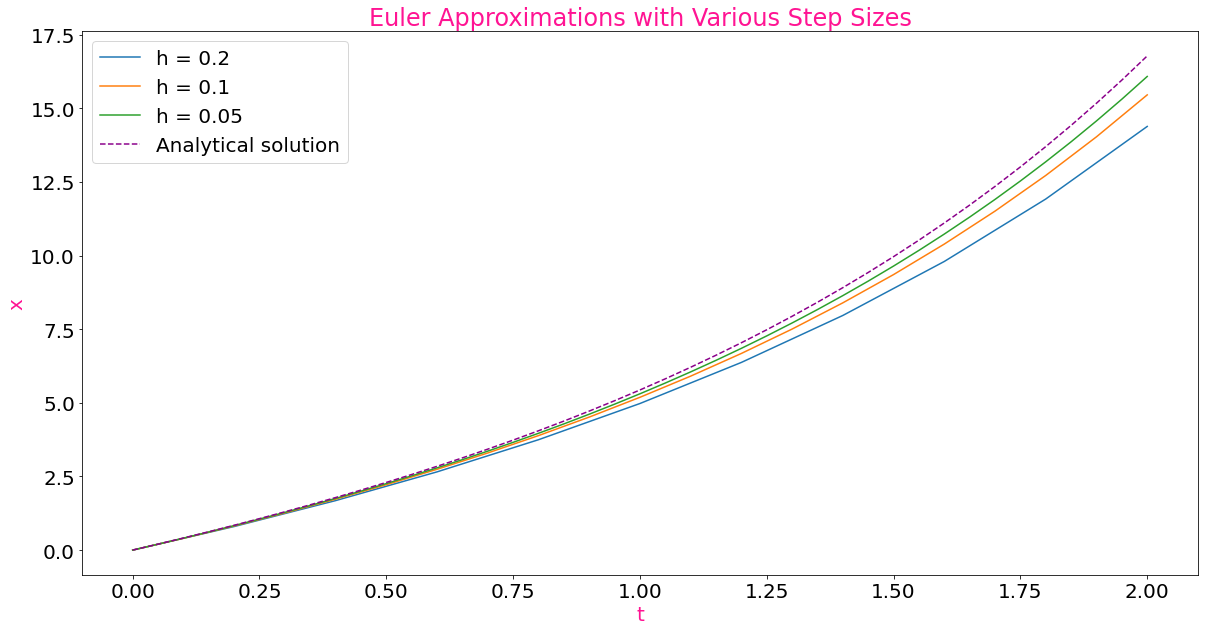

In [20]:
X = lambda t: -2+(2*t)+2*np.exp(t) #analytical solution
f = lambda x, t: x - (2*t) + 4     #func want to use Euler's method on

x_0 =[0] #initial condition

#make the plot bigger:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (20, 10)

h_vals = [0.2, 0.1, 0.05] #all of the step sizes for when make the time domains

for h in h_vals: 
    t = np.arange(0, 2+h, h) #get all of the time domains for each plot
    plt.plot(t, euler(f, x_0, t), label = "h = " + str(h)) #plot for all the different h values

plt.plot(t, X(t), '--', label = "Analytical solution", color = "darkmagenta") #plot analytical sol

plt.xlabel("t", color = "deeppink")
plt.ylabel("x", color = "deeppink")
plt.title("Euler Approximations with Various Step Sizes", color = "deeppink")
plt.legend(loc = "best")

plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [26]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #will be same as Euler method execpt have different formula for x[t_i+1]
    n = len(t) 
    h = t[1] - t[0]
        
    x = np.zeros((n, len(x0))) 
    for i in range(n-1):
        x[i+1] = x[i] + h*f(x[i] + (h/2)*(f(x[i], t[i])), t[i] + (h/2)) #midpoint method 
        
    return x

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    n = len(t)
    h = t[1] - t[0]
        
    x = np.zeros((n, len(x0))) 
    x[0] = x0 #need to set the initial condition for x
    
    for i in range(n-1):
        K1 = f(x[i], t[i])                    #K1 in RK4 method def
        K2 = f(x[i] + 0.5*h*K1, t[i] + 0.5*h) #K2 in RK4 method def
        K3 = f(x[i] + 0.5*h*K2, t[i] + 0.5*h) #K3 in RK4 method def
        K4 = f(x[i] + h*K3, t[i+1])           #K4 in RK4 method def
        
        x[i+1] = x[i] + (1/6)*h*(K1 + 2*K2 + 2*K3 + K4) #RK4 method equation
        
    return x

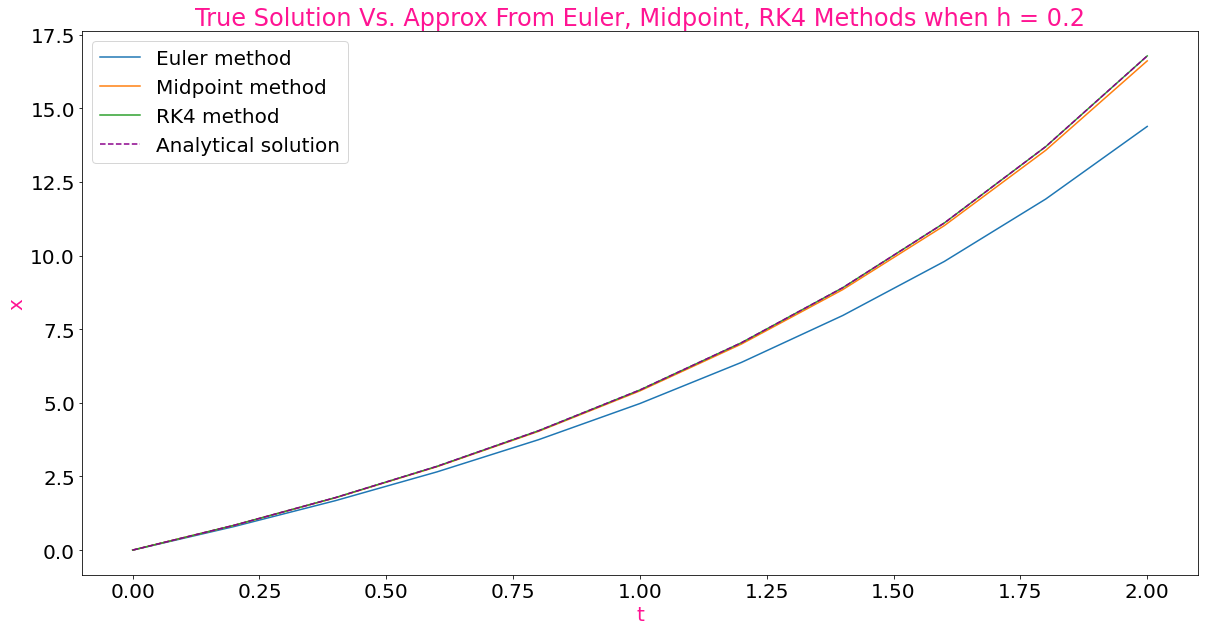

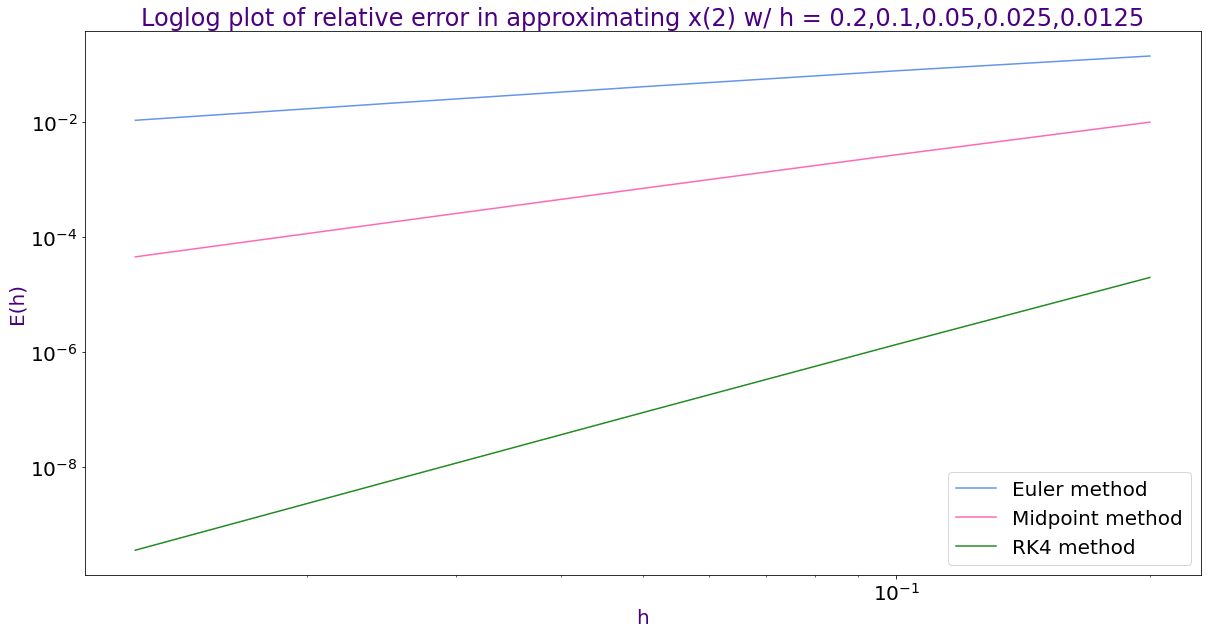

In [27]:
X = lambda t: -2+(2*t)+2*np.exp(t) #true solution
f = lambda x, t: x - (2*t) + 4     #func want to use the 3 methods on

x_0 =[0] #initial condition
h_vals = [0.2, 0.1, 0.05, 0.025, 0.0125] #all of the step sizes for when make the time domains

#make the 1st plot: want plot true sol against approx from each method when h=0.2
first_t = np.arange(0, 2+h_vals[0], h_vals[0]) #only want plot for when h = 0.2

plt.plot(first_t, euler(f, x_0, first_t), label = "Euler method") #plot euler 
plt.plot(first_t, midpoint(f,x_0,first_t), label = "Midpoint method") #plot midpoint 
plt.plot(first_t, rk4(f,x_0,first_t), label = "RK4 method")      #plot RK4 

plt.plot(first_t, X(first_t), '--', label = "Analytical solution", color = "darkmagenta") #plot true sol

plt.xlabel("t", color = "deeppink")
plt.ylabel("x", color = "deeppink")
plt.title("True Solution Vs. Approx From Euler, Midpoint, RK4 Methods when h = 0.2", color = "deeppink")
plt.legend(loc = "best")

plt.show()

#make the 2nd plot:
#lists to store all of the relative errors for each method in:
e_errs = []
m_errs = []
r_errs = []

for h in h_vals: 
    t = np.arange(0, 2+h, h) #get all of the time domains for each plot
    
    #get the x for each method:
    eul_x = euler(f, x_0, t)   
    midp_x = midpoint(f, x_0, t)
    rk_x = rk4(f, x_0, t)
    
    #find the relative error for each method, add it to each list:
    e_errs.append(np.abs(eul_x[-1] - X(2))/np.abs(X(2)))
    m_errs.append(np.abs(midp_x[-1] - X(2))/np.abs(X(2)))
    r_errs.append(np.abs(rk_x[-1] - X(2))/np.abs(X(2)))

#make loglog plot of each methods relative errors as function of h (so want to plot over h values)
plt.loglog(h_vals, e_errs, label = "Euler method", color = "cornflowerblue")    
plt.loglog(h_vals, m_errs, label = "Midpoint method", color = "hotpink")
plt.loglog(h_vals, r_errs, label = "RK4 method", color = "forestgreen")

plt.legend(loc = "best")
plt.xlabel("h", color = "indigo")
plt.ylabel("E(h)", color = "indigo")
plt.title("Loglog plot of relative error in approximating x(2) w/ h = 0.2,0.1,0.05,0.025,0.0125", color = "indigo")
plt.show()



## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

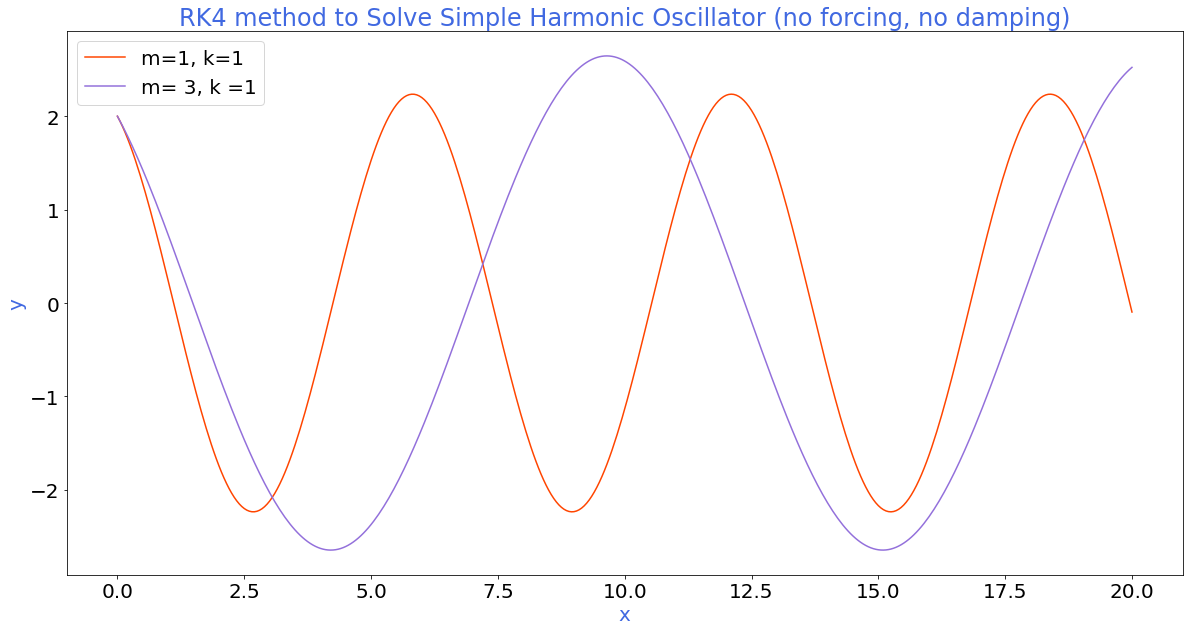

In [28]:
eq_1 = lambda x,t: np.array([x[1], -x[0]]) #case where m,k = 1. formula comes from x' for this kind of equation in lab manual
eq_2 = lambda x,t: np.array([x[1], -(1/3)*x[0]]) #case where m=3, k=1

x0 = [2, -1] #initial condts from problem given
t = np.arange(0, 20+0.05, 0.05) #time domain from 0 to 20

#get the solutions using RK4 method:
x1 = rk4(eq_1, x0, t)
x2 = rk4(eq_2, x0, t)

#plot the approximation solutions:
plt.plot(t, x1[:,0], label = "m=1, k=1", color = "orangered")
plt.plot(t, x2[:,0], label = "m= 3, k =1", color = "mediumpurple")

plt.legend(loc = "best")
plt.xlabel("x", color = "royalblue")
plt.ylabel("y", color = "royalblue")
plt.title("RK4 method to Solve Simple Harmonic Oscillator (no forcing, no damping)", color = "royalblue")

plt.show()

## Problem 4
Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

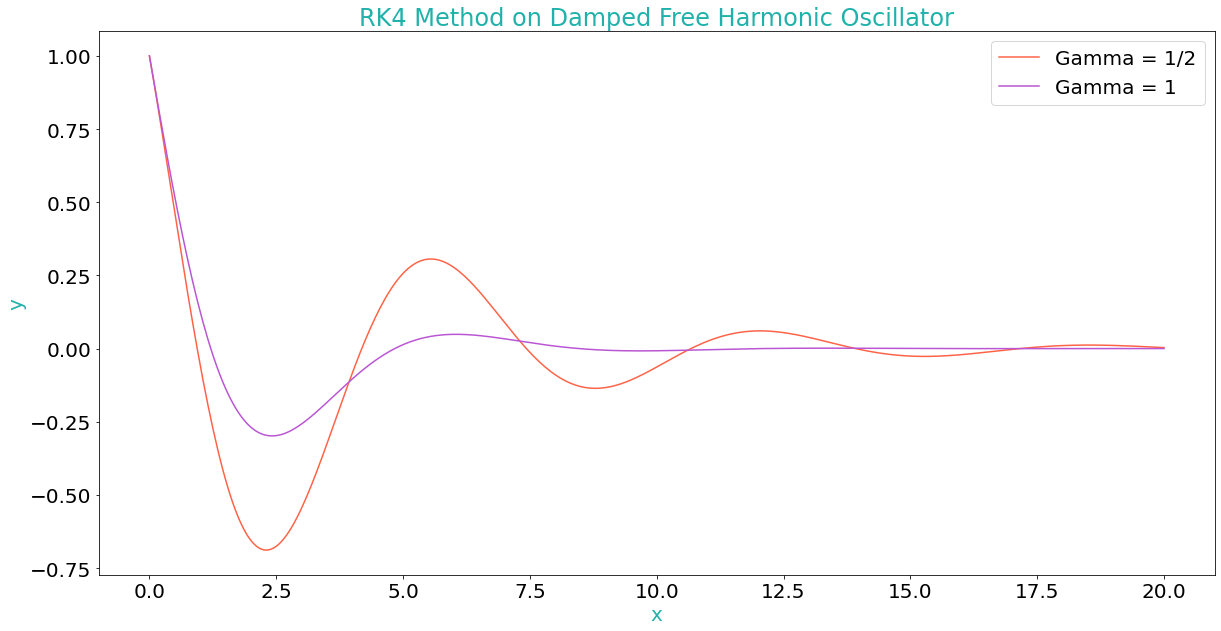

In [29]:
#k and m both equal 1 in the equation given
#have x=[y, y'] so x'=[y', (-ky - gammay')/m]
eq_1 = lambda x,t: np.array([x[1], -x[0]-(1/2)*x[1]]) #case where have 𝛾 = 1/2
eq_2 = lambda x,t: np.array([x[1], -x[0]-x[1]]) #case where have 𝛾 = 1

x0 = [1, -1] #initial condts from problem given𝛾
t = np.arange(0, 20+0.05, 0.05) #time domain from 0 to 20 including 20

#get the solutions using RK4 method:
x1 = rk4(eq_1, x0, t)
x2 = rk4(eq_2, x0, t)

#plot the approximation solutions:
plt.plot(t, x1[:,0], label = "Gamma = 1/2", color = "tomato")
plt.plot(t, x2[:,0], label = "Gamma = 1", color = "mediumorchid")

plt.legend(loc = "best")
plt.xlabel("x", color = "lightseagreen")
plt.ylabel("y", color = "lightseagreen")
plt.title("RK4 Method on Damped Free Harmonic Oscillator", color = "lightseagreen")

plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

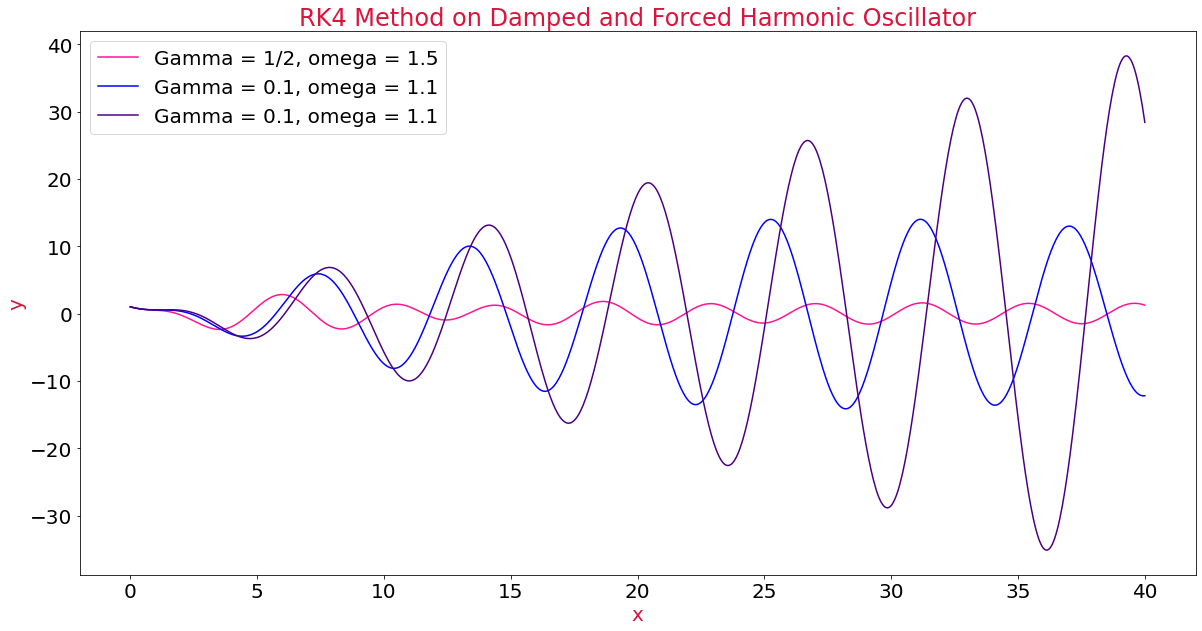

In [30]:
#k and m both equal 2 in the equation given
#have x=[y, y'] so x'=[y', (-ky - gammay')/m +2cos(wt)]
eq_1 = lambda x,t: np.array([x[1], (-2*x[0]-(1/2)*x[1])/2 + 2*np.cos(1.5*t)]) #case where have 𝛾 = 1/2, w = 1.5
eq_2 = lambda x,t: np.array([x[1], (-2*x[0]-(0.1)*x[1])/2 + 2*np.cos(1.1*t)]) #case where have 𝛾 = 0.1, w = 1.1
eq_3 = lambda x,t: np.array([x[1], (-2*x[0]-(0)*x[1])/2 + 2*np.cos(t)]) #case where 𝛾 = 0, w = 1

x0 = [1, -1] #initial condts from problem given𝛾
t = np.arange(0, 40+0.05, 0.05) #time domain from 0 to 20 including 20

#get the solutions using RK4 method:
x1 = rk4(eq_1, x0, t)
x2 = rk4(eq_2, x0, t)
x3 = rk4(eq_3, x0, t)

#plot the approximation solutions:
plt.plot(t, x1[:,0], label = "Gamma = 1/2, omega = 1.5", color = "deeppink")
plt.plot(t, x2[:,0], label = "Gamma = 0.1, omega = 1.1", color = "blue")
plt.plot(t, x3[:,0], label = "Gamma = 0.1, omega = 1.1", color = "indigo")


plt.legend(loc = "best")
plt.xlabel("x", color = "crimson")
plt.ylabel("y", color = "crimson")
plt.title("RK4 Method on Damped and Forced Harmonic Oscillator", color = "crimson")

plt.show()